In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
%matplotlib inline

In [2]:
data = pd.read_csv("updatedDatasets/Update3.csv")

In [3]:
dataT = data[data['IDE'].notna()]

In [4]:
dataT.head(1)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,YearsCodedJob,DeveloperType,...,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Gender,HighestEducationParents,Salary,ExpectedSalary,Assess_Scoring
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,NaN,iOS,iOS,Atom; Xcode,Turn on some music,Male,High school,NaN,NaN,30.5


#  [IDE] Segregation, Cleaning and Analysis

In [5]:
A = {}
J = list()
for i in dataT['IDE']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [6]:
A

{'Atom': 6540,
 'Xcode': 3850,
 'Notepad++': 12681,
 'Vim': 9679,
 'PyCharm': 3268,
 'RubyMine': 613,
 'Visual Studio': 13677,
 'Visual Studio Code': 6826,
 'Sublime Text': 9978,
 'IntelliJ': 7418,
 'TextMate': 439,
 'IPython / Jupyter': 1914,
 'NetBeans': 2909,
 'Emacs': 1956,
 'Coda': 227,
 'PHPStorm': 2965,
 'Android Studio': 5953,
 'RStudio': 996,
 'Komodo': 254,
 'Eclipse': 7899,
 'Light Table': 70,
 'Zend': 156}

In [7]:
D1=pd.Series(A,name='IDE Users')

In [8]:
D1 =D1.to_frame()

In [9]:
D1=D1.reset_index(level=0)

In [10]:
D1.columns=['IDE','Users']

In [11]:
D1 = D1.sort_values(by='Users',ascending=False)

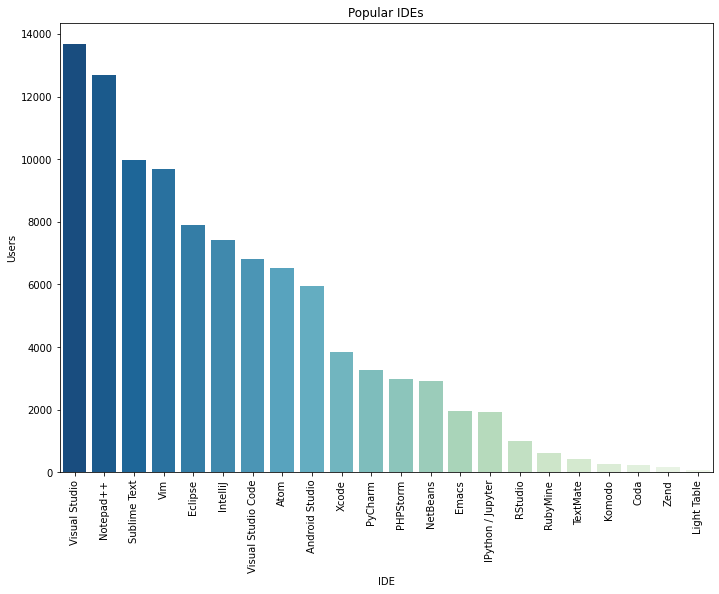

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D1,x='IDE',y='Users',order=D1['IDE'],palette='GnBu_r')
plt.title('Popular IDEs')
plt.xticks(rotation=90)
plt.show()

Thus, we see that Visual Studio, Notepad++ and Sublime Text are amongst the top IDE tools preferred by the developers.

# [HaveWorkedLanguage] Segregation, Cleaning and Analysis

In [13]:
A = {}
J = list()
for i in dataT['HaveWorkedLanguage']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [14]:
A

{'Swift': 2335,
 'JavaScript': 22297,
 'Python': 11344,
 'Ruby': 3243,
 'SQL': 18269,
 'Java': 14211,
 'PHP': 9993,
 'Matlab': 1511,
 'R': 1573,
 'Rust': 404,
 'CoffeeScript': 1169,
 'Clojure': 380,
 'Elixir': 368,
 'Erlang': 272,
 'Haskell': 624,
 'C#': 12215,
 'Objective-C': 2317,
 'Assembly': 1743,
 'C': 6717,
 'C++': 7839,
 'VB.NET': 2197,
 'Perl': 1523,
 'Scala': 1277,
 'F#': 445,
 'TypeScript': 3416,
 'Lua': 1009,
 'VBA': 1489,
 'Groovy': 1173,
 'Go': 1525,
 'nan': 473,
 'Smalltalk': 253,
 'Visual Basic 6': 1004,
 'Common Lisp': 263,
 'Dart': 139,
 'Julia': 129,
 'Hack': 100}

In [15]:
D2 = pd.Series(A, name = 'Languages Already Worked')

In [16]:
D2 = D2.drop('nan')

In [17]:
D2 = D2.to_frame()

In [18]:
D2 = D2.reset_index(level=0)

In [19]:
D2.columns=['Language','Users']

In [20]:
D2 = D2.sort_values(by='Users',ascending=False)

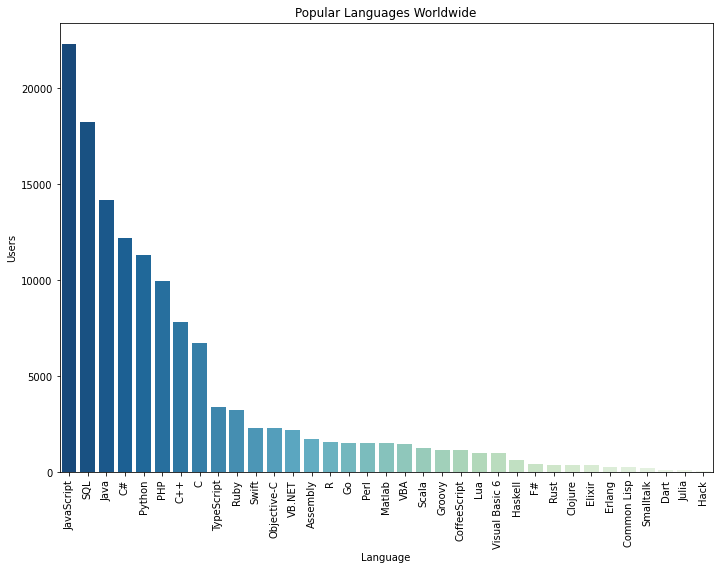

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D2,x='Language',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)
plt.title('Popular Languages Worldwide')
plt.show()

Thus we see Javascript is the most commonly used language amongst the developers

# Language Having Higher Salary

In [22]:
D=dict()
J=list()
for i in range(len(data)):
    x=data.iloc[i]['HaveWorkedLanguage']
    J=str(x).split('; ')
    if pd.isna(data.iloc[i]['Salary']):
            continue
    for v in J:
        if v not in D:
            D[v]=[1,data.iloc[i]['Salary']]
        else:
            D[v][0]=D[v][0]+1
            D[v][1]=D[v][1]+data.iloc[i]['Salary']
        J.clear()

In [23]:
D.pop('nan')
D

{'Java': [5063, 274961836.30963445],
 'Matlab': [106, 4894303.809797043],
 'CoffeeScript': [649, 38478195.474818],
 'C#': [7901, 470683636.4026364],
 'Objective-C': [292, 15017230.281759894],
 'R': [130, 6831123.690933869],
 'C': [4010, 231265483.76123568],
 'Assembly': [1169, 65964828.717954345],
 'JavaScript': [5105, 273749983.653353],
 'Perl': [121, 8197748.992534114],
 'PHP': [436, 20835695.99036916],
 'C++': [2734, 159697470.69425428],
 'Go': [516, 33450677.3442025],
 'Elixir': [144, 7951944.961607413],
 'Python': [752, 40922176.701971054],
 'Ruby': [138, 7766612.690607032],
 'SQL': [266, 16751392.811141621],
 'Common Lisp': [39, 2682125.488112227],
 'Groovy': [583, 36732754.60800676],
 'Scala': [46, 3384811.4687506547],
 'Erlang': [46, 2637604.625225813],
 'Swift': [51, 2608429.579502683],
 'Clojure': [161, 11288201.28447709],
 'Rust': [4, 294774.9121448517],
 'Haskell': [81, 4305808.627949886],
 'Dart': [34, 1819020.1286171395],
 'Lua': [20, 1220877.1984481378],
 'Hack': [20, 13

In [24]:
temp = pd.DataFrame(D).transpose()
temp.columns = ['Count','TotalSalary']
temp.head()

,Count,TotalSalary
Java,5063.0,2.749618e+08
Matlab,106.0,4.894304e+06
CoffeeScript,649.0,3.847820e+07
C#,7901.0,4.706836e+08
Objective-C,292.0,1.501723e+07


In [25]:
temp['AvgSalary']=temp['TotalSalary']/temp['Count']
temp.drop('TotalSalary',axis=1,inplace=True)
temp.head()

,Count,AvgSalary
Java,5063.0,54308.085386
Matlab,106.0,46172.677451
CoffeeScript,649.0,59288.436787
C#,7901.0,59572.666296
Objective-C,292.0,51428.870828


In [26]:
temp.reset_index(inplace=True)
temp.sort_values('AvgSalary',ascending=False).head()

,index,Count,AvgSalary
29,Smalltalk,62.0,87855.410630
34,TypeScript,7.0,74606.885120
23,Rust,4.0,73693.728036
19,Scala,46.0,73582.858016
32,F#,23.0,70469.940540


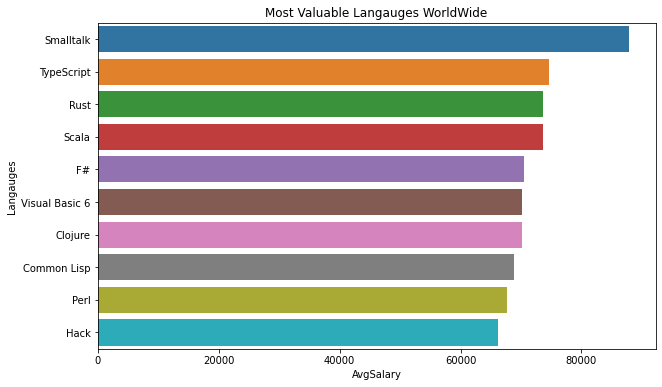

In [27]:
plt.figure(figsize=(10,6))
s.barplot(y='index',x='AvgSalary',data=temp.sort_values('AvgSalary',ascending=False).head(10))
plt.title('Most Valuable Langauges WorldWide')
plt.ylabel('Langauges')
plt.show()

# [WantWorkLanguage] Segregation,Cleaning and Analysis

In [28]:
A = {}
J = list()
for i in dataT['WantWorkLanguage']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [29]:
A

{'Swift': 4464,
 'Java': 9750,
 'Python': 12219,
 'Ruby': 3871,
 'SQL': 10936,
 'C': 4679,
 'Rust': 2670,
 'Matlab': 883,
 'R': 2551,
 'Clojure': 1280,
 'Elixir': 1542,
 'Erlang': 1030,
 'Haskell': 2259,
 'TypeScript': 5622,
 'JavaScript': 15929,
 'Julia': 505,
 'Scala': 3075,
 'F#': 2009,
 'Go': 5684,
 'C#': 9974,
 'Objective-C': 1803,
 'Assembly': 1856,
 'C++': 7369,
 'VB.NET': 770,
 'Perl': 1046,
 'Hack': 322,
 'PHP': 5194,
 'Lua': 1084,
 'Groovy': 844,
 'nan': 3105,
 'CoffeeScript': 1004,
 'Common Lisp': 629,
 'Dart': 487,
 'Smalltalk': 349,
 'VBA': 412,
 'Visual Basic 6': 270}

In [30]:
D3 = pd.Series(A,name ='Want to Work Language')

In [31]:
D3 = D3.drop('nan')

In [32]:
D3 = D3.to_frame()

In [33]:
D3 = D3.reset_index(level=0)

In [34]:
D3.columns=['Want Language','Users']

In [35]:
D3= D3.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'JavaScript'),
  Text(1, 0, 'Python'),
  Text(2, 0, 'SQL'),
  Text(3, 0, 'C#'),
  Text(4, 0, 'Java'),
  Text(5, 0, 'C++'),
  Text(6, 0, 'Go'),
  Text(7, 0, 'TypeScript'),
  Text(8, 0, 'PHP'),
  Text(9, 0, 'C'),
  Text(10, 0, 'Swift'),
  Text(11, 0, 'Ruby'),
  Text(12, 0, 'Scala'),
  Text(13, 0, 'Rust'),
  Text(14, 0, 'R'),
  Text(15, 0, 'Haskell'),
  Text(16, 0, 'F#'),
  Text(17, 0, 'Assembly'),
  Text(18, 0, 'Objective-C'),
  Text(19, 0, 'Elixir'),
  Text(20, 0, 'Clojure'),
  Text(21, 0, 'Lua'),
  Text(22, 0, 'Perl'),
  Text(23, 0, 'Erlang'),
  Text(24, 0, 'CoffeeScript'),
  Text(25, 0, 'Matlab'),
  Text(26, 0, 'Groovy'),
  Text(27, 0, 'VB.NET'),
  Text(28, 0, 'Common Lisp'),
  Text(29, 0, 'Julia'),
  Text(30, 0, 'Dart'),
  Text(31, 0, 'VBA'),
  Text(32, 0, 'Smalltalk'),
  Text(33, 0, 'Hack'),
  Text(34, 0, '

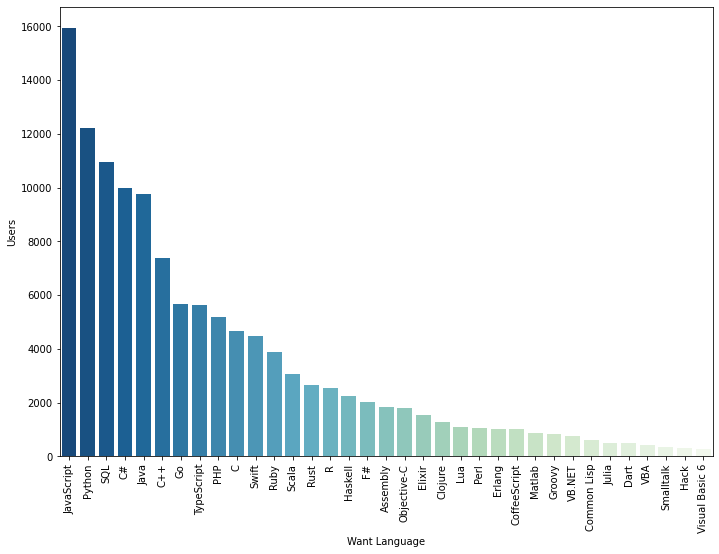

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D3,x='Want Language',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)

Most of the developers aspire to learn Javascript

# [WorkedDatabase] Segregation,Cleaning and Analysis

In [37]:
A = {}
J = list()
for i in dataT['HaveWorkedDatabase']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [38]:
A

{'nan': 7026,
 'MySQL': 16001,
 'SQLite': 7699,
 'MongoDB': 6071,
 'Redis': 4083,
 'SQL Server': 11129,
 'PostgreSQL': 7673,
 'Oracle': 4758,
 'Cassandra': 882}

In [39]:
D4= pd.Series(A,name="Have Worked Database")

In [40]:
D4 = D4.drop('nan')

In [41]:
D4 = D4.to_frame()

In [42]:
D4 =D4.reset_index(level=0)

In [43]:
D4.columns=['Database Worked','Users']

<AxesSubplot:xlabel='Database Worked', ylabel='Users'>

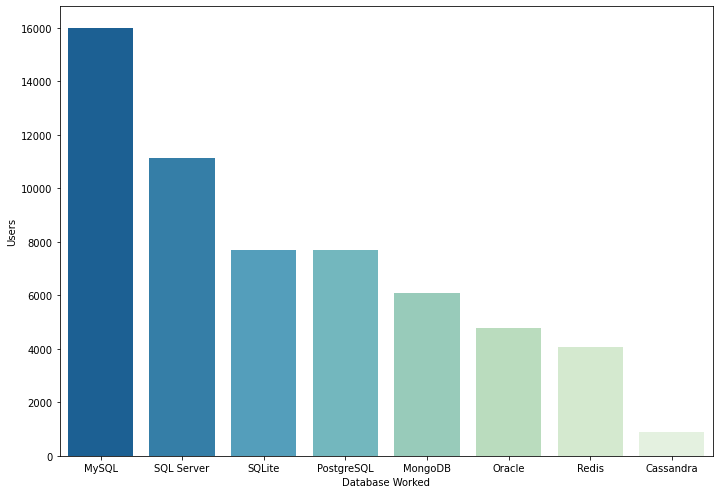

In [44]:
D4 = D4.sort_values(by='Users',ascending=False)
fig,ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D4,x='Database Worked',y ='Users',palette='GnBu_r')

This, we see SQL and SQL Server are amongst the most indemand Database Languages

# [WantDatabase] Segregation,Cleaning,Analysis

In [45]:
A = {}
J = list()
for i in dataT['WantWorkDatabase']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [46]:
D5 = pd.Series(A,name ="Want Work Database")

In [47]:
D5 = D5.drop('nan')

In [48]:
D5 = D5.to_frame()

In [49]:
D5 =D5.reset_index(level=0)

In [50]:
D5.columns=['Want Database', 'Users']

In [51]:
D5 = D5.sort_values(by='Users',ascending=False)

<AxesSubplot:xlabel='Want Database', ylabel='Users'>

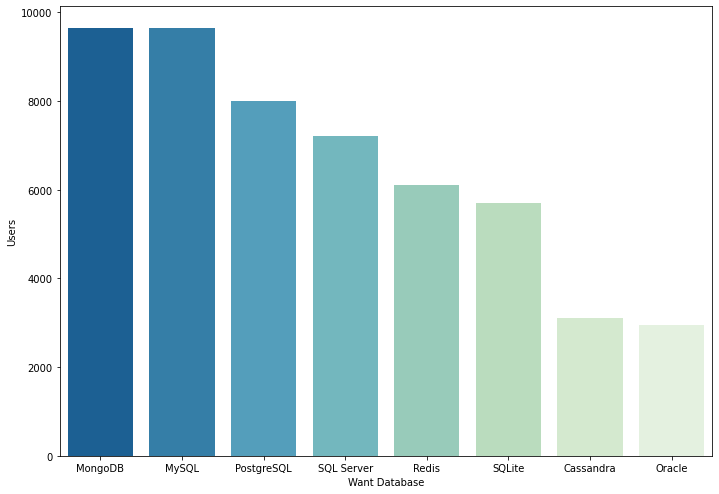

In [52]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D5,x='Want Database',y='Users',palette='GnBu_r')


Hence, MongoDB iscoming up to become the most indemand database language that developers want to use

# [WorkedPlatform] Segregation,Cleaning,Analysis

In [53]:
A = {}
J = list()
for i in dataT['HaveWorkedPlatform']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [54]:
A

{'iOS': 4717,
 'Amazon Web Services (AWS)': 8085,
 'nan': 7303,
 'Windows Desktop': 11676,
 'Linux Desktop': 9394,
 'Mac OS': 5281,
 'Android': 8093,
 'Microsoft Azure': 3306,
 'Windows Phone': 1110,
 'Raspberry Pi': 4595,
 'WordPress': 4451,
 'Arduino': 2927,
 'Serverless': 604,
 'SharePoint': 1064,
 'Mainframe': 392,
 'Salesforce': 747}

In [55]:
D6 = pd.Series(A,name ='Have Worked Platform')

In [56]:
D6=D6.drop('nan')

In [57]:
D6

iOS                           4717
Amazon Web Services (AWS)     8085
Windows Desktop              11676
Linux Desktop                 9394
Mac OS                        5281
Android                       8093
Microsoft Azure               3306
Windows Phone                 1110
Raspberry Pi                  4595
WordPress                     4451
Arduino                       2927
Serverless                     604
SharePoint                    1064
Mainframe                      392
Salesforce                     747
Name: Have Worked Platform, dtype: int64

In [58]:
D6= D6.to_frame()

In [59]:
D6=D6.reset_index(level=0)
D6

,index,Have Worked Platform
0,iOS,4717
1,Amazon Web Services (AWS),8085
2,Windows Desktop,11676
3,Linux Desktop,9394
4,Mac OS,5281
5,Android,8093
6,Microsoft Azure,3306
7,Windows Phone,1110
8,Raspberry Pi,4595
9,WordPress,4451


In [60]:
D6.columns=['Platform Worked','Users']

In [61]:
D6=D6.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Windows Desktop'),
  Text(1, 0, 'Linux Desktop'),
  Text(2, 0, 'Android'),
  Text(3, 0, 'Amazon Web Services (AWS)'),
  Text(4, 0, 'Mac OS'),
  Text(5, 0, 'iOS'),
  Text(6, 0, 'Raspberry Pi'),
  Text(7, 0, 'WordPress'),
  Text(8, 0, 'Microsoft Azure'),
  Text(9, 0, 'Arduino'),
  Text(10, 0, 'Windows Phone'),
  Text(11, 0, 'SharePoint'),
  Text(12, 0, 'Salesforce'),
  Text(13, 0, 'Serverless'),
  Text(14, 0, 'Mainframe')])

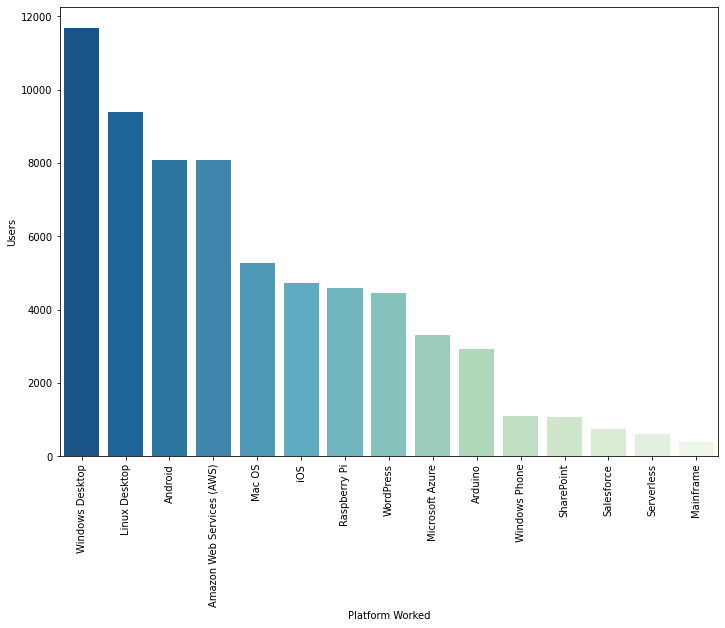

In [62]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D6,x='Platform Worked',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)

hence, Windows Desktop is the most popular Platform to work for Mobile Developers.

# [WantWorkPlatform] Segregation,Cleaning and Analysis

In [63]:
A = {}
J = list()
for i in dataT['WantWorkPlatform']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [64]:
A

{'iOS': 7139,
 'Linux Desktop': 9134,
 'Raspberry Pi': 7911,
 'Amazon Web Services (AWS)': 10593,
 'nan': 8474,
 'Windows Desktop': 7497,
 'Mac OS': 5342,
 'Arduino': 4554,
 'Serverless': 1843,
 'Microsoft Azure': 4427,
 'Android': 10855,
 'Windows Phone': 1380,
 'WordPress': 2290,
 'Salesforce': 617,
 'Mainframe': 396,
 'SharePoint': 649}

In [65]:
D7 = pd.Series(A,name='Want Work Platform')

In [66]:
D7 = D7.drop('nan')

In [67]:
D7 = D7.to_frame()

In [68]:
D7 =D7.reset_index(level=0)
D7.columns=['Want Platform','Users']
D7

,Want Platform,Users
0,iOS,7139
1,Linux Desktop,9134
2,Raspberry Pi,7911
3,Amazon Web Services (AWS),10593
4,Windows Desktop,7497
5,Mac OS,5342
6,Arduino,4554
7,Serverless,1843
8,Microsoft Azure,4427
9,Android,10855


In [69]:
D7=D7.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Android'),
  Text(1, 0, 'Amazon Web Services (AWS)'),
  Text(2, 0, 'Linux Desktop'),
  Text(3, 0, 'Raspberry Pi'),
  Text(4, 0, 'Windows Desktop'),
  Text(5, 0, 'iOS'),
  Text(6, 0, 'Mac OS'),
  Text(7, 0, 'Arduino'),
  Text(8, 0, 'Microsoft Azure'),
  Text(9, 0, 'WordPress'),
  Text(10, 0, 'Serverless'),
  Text(11, 0, 'Windows Phone'),
  Text(12, 0, 'SharePoint'),
  Text(13, 0, 'Salesforce'),
  Text(14, 0, 'Mainframe')])

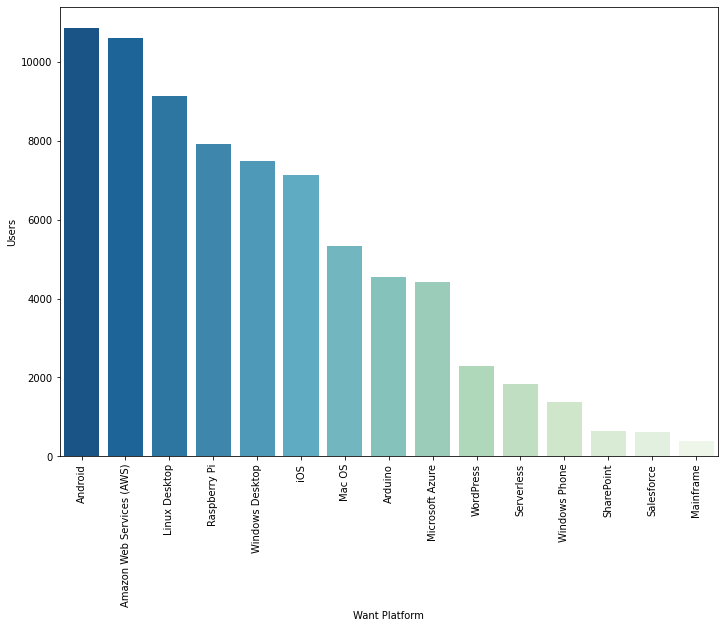

In [70]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D7,x='Want Platform',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)

Hence, we see that Android, AWS, Linux Desktop are amongst the top platforms that users want to learn